Test R² Score: 0.92


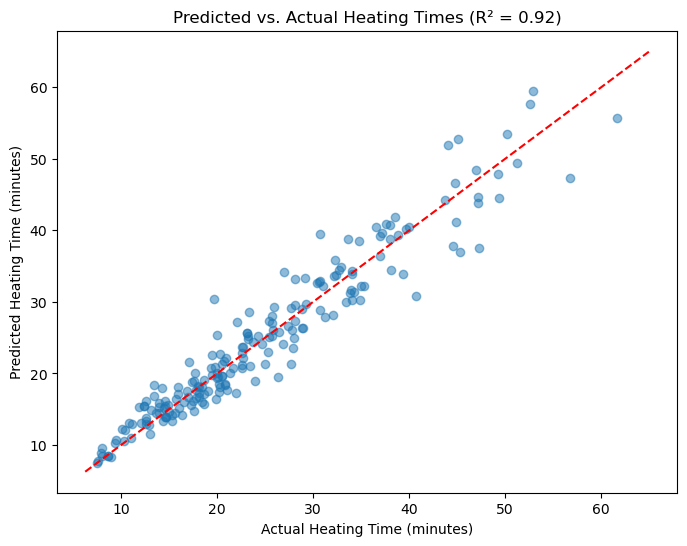

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from joblib import dump

# Split data
X = df[["outdoor_temp", "current_temp", "room_volume"]]
y = df["time_to_reach_target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

dump(model, 'hvac_model.joblib') 

print(f"Test R² Score: {model.score(X_test, y_test):.2f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, model.predict(X_test), alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Heating Time (minutes)")
plt.ylabel("Predicted Heating Time (minutes)")
plt.title("Predicted vs. Actual Heating Times (R² = 0.92)")
plt.show()